In [ ]:
# svc, image processing, try weather forecast

# Weather Forecast

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import numpy as np
from glob import glob
from datetime import datetime

In [ ]:
url = 'https://censusindia.gov.in/2011census/C-series/C-13.html'
page = requests.get(url)
soup = bs(page.text, 'html.parser')

links_pdf = []
links_excel = []
for link in soup.find_all('a'):
    h_link = link.get('href')
    if h_link.startswith('http'):
        if h_link.endswith('pdf'):
            links_pdf.append(h_link)
        if h_link.endswith('xlsx') or h_link.endswith('xls'):
            links_excel.append(h_link)

print(f"Spreadsheets: {len(links_excel)}\nPDF Files:     {len(links_pdf)}")

Spreadsheets: 0
PDF Files:     0


In [ ]:
mumbai = 'mum'

In [ ]:
page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
print(page)
print(f"\nHTML Contents of the page:\n{page.content}")

<Response [200]>

HTML Contents of the page:
b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


In [ ]:
soup = bs(page.content, 'html.parser') # soup now has the entire HTML conents of the URL
# print the HTML content of the page
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


In [ ]:
list(soup.children)

['html',
 '\n',
 <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

In [ ]:
weatherURL = 'https://www.bbc.com/weather/1275339/'  # Mumbai
page = requests.get(weatherURL)
soup = bs(page.text, 'html.parser')

links = soup.find_all('a')
for l in links:
    print(l['href'])

https://www.bbc.co.uk
#wr-location-name-id
https://www.bbc.co.uk/accessibility/
https://account.bbc.com/account
https://www.bbc.co.uk/notifications
https://www.bbc.co.uk
https://www.bbc.co.uk/news
https://www.bbc.co.uk/sport
https://www.bbc.co.uk/weather
https://www.bbc.co.uk/iplayer
https://www.bbc.co.uk/sounds
https://www.bbc.co.uk/bitesize
https://www.bbc.co.uk/cbeebies
https://www.bbc.co.uk/cbbc
https://www.bbc.co.uk/food
https://www.bbc.com/
https://www.bbc.com/news
https://www.bbc.com/sport
https://www.bbc.com/reel
https://www.bbc.com/worklife
https://www.bbc.com/travel
https://www.bbc.com/future
https://www.bbc.com/culture
https://www.bbc.co.uk/schedules/p00fzl9m
https://www.bbc.com/weather
https://www.bbc.co.uk/sounds
#orbit-more-drawer
https://search.bbc.co.uk/search?scope=all&destination=weather_gnl
https://www.bbc.co.uk
https://www.bbc.co.uk/news
https://www.bbc.co.uk/sport
https://www.bbc.co.uk/weather
https://www.bbc.co.uk/iplayer
https://www.bbc.co.uk/sounds
https://www.b

In [ ]:
weatherURL = 'https://www.bbc.com/weather/1275339/'  # Mumbai
def day_met_data():
    """
    Scrap BBC portal on weather forecast and scrap the pages for weather forecast
     at macro-level, i.e., granularity is at day.
    """

    urls = ['today', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6',
            'day7', 'day8', 'day9', 'day10', 'day11', 'day12', 'day13']
    urls = [weatherURL + url for url in urls]

    day_met = []

    day_count = -1
    for url in urls:
        day_count += 1
        page = requests.get(url)
        soup = bs(page.text, 'html.parser')
        day = soup.find(class_ = "wr-day--" + str(day_count))

        m = re.search(r'div aria-label="(?P<day>.*?)"', str(day))
        if m:
            date = (m['day'])

        weather_type = day.find(class_="wr-day__details__weather-type-description").text

        try:
            high_temp = day.find(class_="wr-day-temperature__high-value")
            high_temp_C = high_temp.find(class_="wr-value--temperature--c").text
        except:
            high_temp_C = 'Not Recorded'

        try:
            low_temp = day.find(class_="wr-day-temperature__low-value")
            low_temp_C = low_temp.find(class_="wr-value--temperature--c").text
        except:
            low_temp_C = 'Not Recorded'

        wind_speed = day.find(class_="wr-value--windspeed wr-value--windspeed--kph").text

        day, date = date.split()[0], ' '.join(date.split()[1:])
        day_met.append([day, date + ', 2021', high_temp_C, low_temp_C, weather_type, wind_speed])

    return day_met

In [ ]:
df = pd.DataFrame(day_met_data(), columns=['day','date','high_temp','low_temp','weather_type','wind_speed'])
df

,day,date,high_temp,low_temp,weather_type,wind_speed
0,Saturday,"8th July, 2021",30°,26°,Thundery showers and a moderate breeze,26 km/h
1,Sunday,"9th July, 2021",30°,26°,Thundery showers and a moderate breeze,24 km/h
2,Monday,"10th July, 2021",30°,26°,Thundery showers and a gentle breeze,19 km/h
3,Tuesday,"11th July, 2021",30°,26°,Thundery showers and a gentle breeze,17 km/h
4,Wednesday,"12th July, 2021",30°,26°,Thundery showers and a gentle breeze,14 km/h
5,Thursday,"13th July, 2021",29°,26°,Thundery showers and a gentle breeze,14 km/h
6,Friday,"14th July, 2021",29°,26°,Thundery showers and a gentle breeze,17 km/h
7,Saturday,"15th July, 2021",29°,26°,Thundery showers and a gentle breeze,16 km/h
8,Sunday,"16th July, 2021",29°,26°,Thundery showers and a gentle breeze,19 km/h
9,Monday,"17th July, 2021",30°,26°,Thundery showers and a moderate breeze,21 km/h


In [ ]:
weatherURL = 'https://www.bbc.com/weather/1275339/'  # Mumbai

def hourly_met():
#     urls = ['today', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6',
#             'day7', 'day8', 'day9', 'day10', 'day11', 'day12', 'day13']
    urls = ['day1', 'day2', 'day3', 'day4', 'day5', 'day6',
            'day7', 'day8', 'day9', 'day10', 'day11', 'day12', 'day13']
    urls = [weatherURL + url for url in urls]

    hrly_met = []

    day_count = -1
    for url in urls[:1]: # for each day in the fortnight

        print(url) #**

        day_count += 1
        # try:
        page = requests.get(url)
        soup = bs(page.text, 'html.parser')
        # find the date
        day = soup.find(class_ = "wr-day--" + str(day_count))

        # print(day)  # **

        m = re.search(r'div aria-label="(?P<day>.*?)"', str(day))
        if m:
            date = (m['day'])
        else:
            date = np.NaN

        print(date)

        time_slots_list = soup.find('div',class_="wr-time-slot-list__item wr-time-slot-list__item--time-slots")
        ts_lists = time_slots_list.find_all('li', class_="wr-time-slot wr-js-time-slot ")

        print(ts_lists)

        ts_data = []
        for ts_list in ts_lists:
            today = re.sub('(\d)(th|nd|st|rd)', r'\1', date) + ' 2023'

            ts_dict = {'date':today}
            ts_dict['hour'] = ts_list.find(class_ = "wr-time-slot-primary__hours").text
            ts_dict['minute'] = ts_list.find(class_ = "wr-time-slot-primary__minutes").text
            ts_dict['wr_type'] = ts_list.find(class_ = "wr-time-slot-primary__weather-type-description").text
            ts_dict['temp'] = ts_list.find(class_ = "wr-value--temperature--c").text
            wind = ts_list.find(class_ = "wr-value--windspeed wr-value--windspeed--kph").text
            ts_dict['precep'] = ts_list.find(class_ = "wr-time-slot-secondary__chance-of-rain-value").text
            ts_dict['wind_dir'] = ts_list.find(class_ = "wr-time-slot-secondary__wind-direction").text

            bottom_sec = ts_list.find_all(class_="wr-time-slot-secondary__bottom-section")
            for slots in bottom_sec:
                try:
                    for slot in slots:
                        labels = slot.find_all('dt')
                        values = slot.find_all('dd')
                        for i in range(len(labels)):
                            ts_dict[labels[i].text] = values[i].text
                except:
                    pass
            ts_data.append(ts_dict)

        for data in ts_data:
            # increment the date after midnight
            if data['hour'] < '06':
                dow, day, month, year = data['date'].split()
                day = str(int(day)+1)
                data['date'] = ' '.join([dow, day, month, year])
            hrly_met.append('\t'.join(data.values()))
        # except:
        #     print('error')
    return hrly_met

hrly = hourly_met()

https://www.bbc.com/weather/1275339/day1
Saturday 8th July
[]


# Image Processing

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import random
from glob import glob

In [ ]:
from PIL import Image
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = ('/content/drive/MyDrive/practise/images')

In [ ]:
files = os.listdir(filepath)
for file_name in files:
    if file_name.endswith(('.png', '.jpg', '.jpeg', '.webp')):
        file_path = os.path.join(filepath, file_name)
        image = Image.open(file_path)
        if image.mode != "RGB":
            image = image.convert("RGB")
        output_path = os.path.join(filepath, file_name.split('.')[0] + ".jpg")
        image.save(output_path, "JPEG")
        image.close()

In [ ]:
images = glob('/content/drive/MyDrive/practise/images/*.jpg')

In [ ]:
images

['/content/drive/MyDrive/practise/images/Picture_013a.jpg',
 '/content/drive/MyDrive/practise/images/IMG_20230701_182250_LMC_Jeus_V98_8-8T-9R.jpg',
 '/content/drive/MyDrive/practise/images/IMG_20221124_164525738_HDR.jpg',
 '/content/drive/MyDrive/practise/images/1686934747285.jpg',
 '/content/drive/MyDrive/practise/images/SPOILER_IMG_20230501_174038_879.jpg',
 '/content/drive/MyDrive/practise/images/mine.jpg',
 '/content/drive/MyDrive/practise/images/image.jpg']

In [ ]:
r = random.randint(0, len(images)-1)
image = cv2.imread(images[r])
image1 = image[:, :, ::-1]

In [ ]:
len(images)

7

In [ ]:
print(type(image1))
print(f"ndim:\t{image1.ndim}")
print(f"shape:\t{image1.shape}")
print(f"size:\t{image1.size}")
print()

print(f"height:\t\t{image1.shape[0]} pixels")
print(f"width:\t\t{image1.shape[1]} pixels")
print(f"channels:\t  {image1.shape[2]}")

<class 'numpy.ndarray'>
ndim:	3
shape:	(1121, 839, 3)
size:	2821557

height:		1121 pixels
width:		839 pixels
channels:	  3


In [ ]:
print(image1[:2])
print(image1[-2:])

[[[ 54 115 170]
  [ 54 115 170]
  [ 54 115 170]
  ...
  [ 52 107 171]
  [ 51 106 170]
  [ 49 104 168]]

 [[ 54 115 170]
  [ 54 115 170]
  [ 54 115 170]
  ...
  [ 53 108 172]
  [ 52 107 171]
  [ 50 105 169]]]
[[[145 157 147]
  [143 156 147]
  [130 149 145]
  ...
  [ 12   5  12]
  [ 11   4  11]
  [  9   2   9]]

 [[151 156 149]
  [143 152 147]
  [125 144 142]
  ...
  [ 11   4  11]
  [  9   2   9]
  [  9   2   9]]]


In [ ]:
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

print(R.shape, G.shape, B.shape)

(1121, 839) (1121, 839) (1121, 839)


In [ ]:
print(G[:5])
print(G[-5:])
print(R[:5])
print(R[-5:])
print(B[:5])
print(B[-5:])

[[115 115 115 ... 107 106 104]
 [115 115 115 ... 108 107 105]
 [115 115 115 ... 109 108 107]
 [115 115 115 ... 110 110 109]
 [115 115 115 ... 110 111 111]]
[[139 126 150 ...   5   4   2]
 [151 128 142 ...   5   4   2]
 [159 142 140 ...   5   4   2]
 [157 156 149 ...   5   4   2]
 [156 152 144 ...   4   2   2]]
[[170 170 170 ... 171 170 168]
 [170 170 170 ... 172 171 169]
 [170 170 170 ... 173 172 171]
 [170 170 170 ... 174 174 173]
 [170 170 170 ... 174 175 175]]
[[128 114 141 ...  12  11   9]
 [140 117 135 ...  12  11   9]
 [149 132 134 ...  12  11   9]
 [147 147 145 ...  12  11   9]
 [149 147 142 ...  11   9   9]]
[[54 54 54 ... 52 51 49]
 [54 54 54 ... 53 52 50]
 [54 54 54 ... 54 53 52]
 [54 54 54 ... 55 55 54]
 [54 54 54 ... 55 56 56]]
[[136 120 140 ...  12  11   9]
 [143 118 127 ...  12  11   9]
 [147 129 123 ...  12  11   9]
 [145 143 130 ...  12  11   9]
 [151 143 125 ...  11   9   9]]


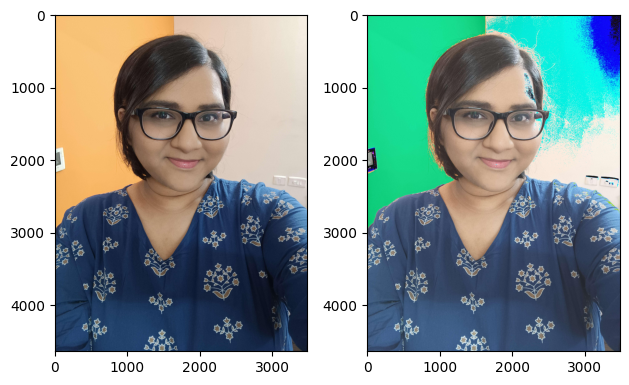

In [ ]:
r = random.randint(0, len(images)-1)
image = cv2.imread(images[r])
fig, ax = plt.subplots(1,2)

image = image[:, :, ::-1] # or image = image[:, :, (2, 1, 0)]
image_A = image.copy()
image_B = image.copy()

ax[0].imshow(image_A);   # original image

touch = 30
image_B += touch            # add/subtract different values
ax[1].imshow(image_B);

plt.tight_layout();

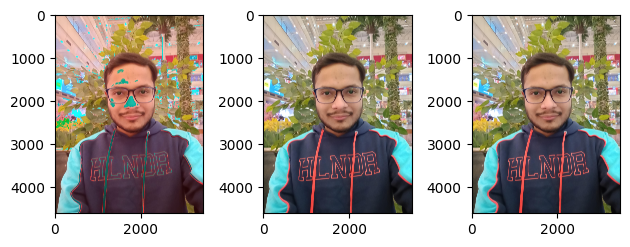

In [ ]:
r = random.randint(0, len(images)-1)
image = cv2.imread(images[r])

fig, ax = plt.subplots(1,3)
image = image[:, :, ::-1] # or image = image[:, :, (2, 1, 0)]

image_C = image.copy()
image_D = image.copy()
image_E = image.copy()

touch = 30

image_C[:, :, 0] += touch   # change channels and values
ax[0].imshow(image_C);

image_C[:, :, 1] += touch+20   # change channels and values
ax[1].imshow(image_D);

image_C[:, :, 2] += touch+20   # change channels and values
ax[2].imshow(image_E);

plt.tight_layout();

In [ ]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Hue, Saturation, Value
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img